In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import scipy as sp
from ipywidgets import interact

In [58]:
def f(x, t):
    return 0 + (np.sin(np.pi*t))*((x<0.7)*(x>0.6)+(x<0.4)*(x>0.3))

def matrix(a, b, X):
    N = len(X)
    main_diag = np.eye(N)
    help_diag = np.eye(N-1)
    main_diag = main_diag*b(X)
    help_diag = -help_diag*a(X[:-1])
    main_diag[1:, :-1] += help_diag
    main_diag[:-1, 1:] += help_diag
    main_diag[0, 0] = 1
    main_diag[0, 1] = -1
    main_diag[-1, -1] = -1
    main_diag[-1, -2] = 1
    return main_diag

a = lambda x: 0.1 + 0.01*np.sin(x) 

def solve_implict(N, K, Tmax, Xmax):
    dt = Tmax/K; h = Xmax/N;
    U = np.zeros((K, N))
    
    X = np.linspace(0, Xmax, N)
    T = np.linspace(0, Tmax, K)
    an = lambda x: a(x)**2*dt/h**2 
    bn = lambda x: 1 + 2*a(x)**2*dt/h**2

    U[0, :] = np.exp(-(X-0.5)**2/0.01)
    #U[:, 0] = u0t(T)
    # initiate SLE b
    B = np.zeros(N)
    A = matrix(an, bn, X)
    for k in range(0, K-1):
        #print(A)
        B[0] = B[-1] = 0
        B[1:-1] = U[k, 1:-1] + dt*f(X[1:-1], dt*k)
        U[k+1] = sp.linalg.solve(A, B)
    return X, T, U, h, dt

x, t, U, dx, dt = solve_implict(500, 2000, 5, 1)


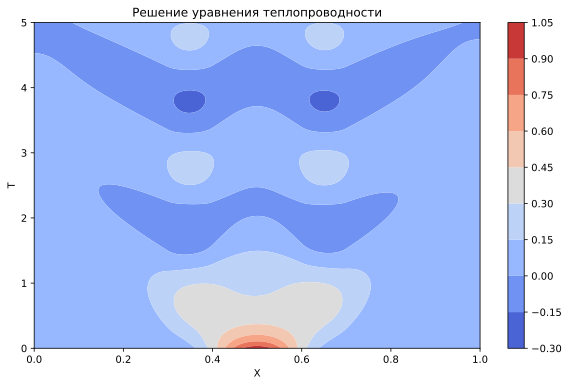

In [59]:
# Построение тепловой карты решения
X, T = np.meshgrid(x, t)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, U, cmap='coolwarm')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('T')
plt.title('Решение уравнения теплопроводности')
plt.show()

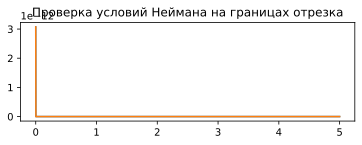

interactive(children=(IntSlider(value=990, description='k', max=1999, step=10), Output()), _dom_classes=('widg…

<function __main__.var(k)>

In [60]:
plt.figure()
plt.subplot(211)
plt.plot(t, U[:, 1]-U[:, 0])
plt.plot(t, U[:, -2]-U[:, -1])
plt.title("Проверка условий Неймана на границах отрезка")
def var(k):
    plt.subplot(212)
    plt.title(f"T(x, t={t[k]})")
    plt.plot(x, U[k, :], label="T(x)")
    plt.xlabel("x")
    plt.show()
    return None

interact(var, k=(0, 2000-1, 10))

In [64]:
# невязка
def var2(k):
    ut = (U[k, 1:-1] - U[k-1, 1:-1])/dt
    uxx = (U[k, 2:] - 2*U[k, 1:-1] + U[k, :-2])/dx**2
    du = np.abs(ut - a(x[1:-1])**2*uxx - f(x[1:-1], t[k]))
    #plt.plot(x[1:-1], ut, label = r"$U_t(x)$")
    #plt.plot(x[1:-1], a(x[1:-1])**2*uxx, label = r"$U_{xx}$")
    plt.plot(x[1:-1], du, label = r"$\delta U$")
    plt.plot(x, (dx+dt)*np.ones(len(x)), label=r"$dx + dt$")
    plt.legend()
    plt.show()
    
    return None

interact(var2, k=(1, 1990, 10))

interactive(children=(IntSlider(value=991, description='k', max=1990, min=1, step=10), Output()), _dom_classes…

<function __main__.var2(k)>